# Advanced Homework 2 

## Required Libraries

In [1]:
# Sklearn Libraries 
from sklearn.datasets import fetch_openml

# General Libraries
import numpy as np
import pandas as pd 

# Plotting Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Ignoring warnings in the whole notebook
import warnings
warnings.filterwarnings("ignore")

## Task 1: Classification on the 'credit-g' Dataset

In [2]:
# Fetching the Datset using fetch_openml
dataset_credit = fetch_openml('credit-g')

In [3]:
# Concating the Data and Target Column as a whole Dataframe
df_credits = pd.concat([dataset_credit['data'], dataset_credit['target']], axis=1)
df_credits

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


In [4]:
# Some Information on the Dataset
df_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   float64 
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   float64 
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   float64 
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   float64 
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   float64 
 13  other_payment_plans     1000 non-null   category
 14  housing                 1

In [5]:
df_credits.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


### 1.1) Determine which features are continuous and which are categorical.


In [22]:
# Selecting numerical features from the dataset
numerical_feats = df_credits.select_dtypes(np.number).columns.tolist()
print('NUMERICAL FEATURES: \n')
numerical_feats

NUMERICAL FEATURES: 



['duration',
 'credit_amount',
 'installment_commitment',
 'residence_since',
 'age',
 'existing_credits',
 'num_dependents']

In [24]:
# Other columns are Categorical Features 
categorical_feats = list((set(df_credits.columns) - set(numerica_feats)))
print('CATEGORICAL FEATURES: \n')
categorical_feats

CATEGORICAL FEATURES: 



['employment',
 'personal_status',
 'other_payment_plans',
 'property_magnitude',
 'job',
 'own_telephone',
 'checking_status',
 'credit_history',
 'housing',
 'other_parties',
 'purpose',
 'savings_status',
 'foreign_worker',
 'class']

In [27]:
# Checking for Null Values
df_credits.isna().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

### 1.2) Visualize the univariate distribution of each continuous feature, and the distribution of the target.


In [53]:
# Setting a style
sns.set_style('darkgrid')

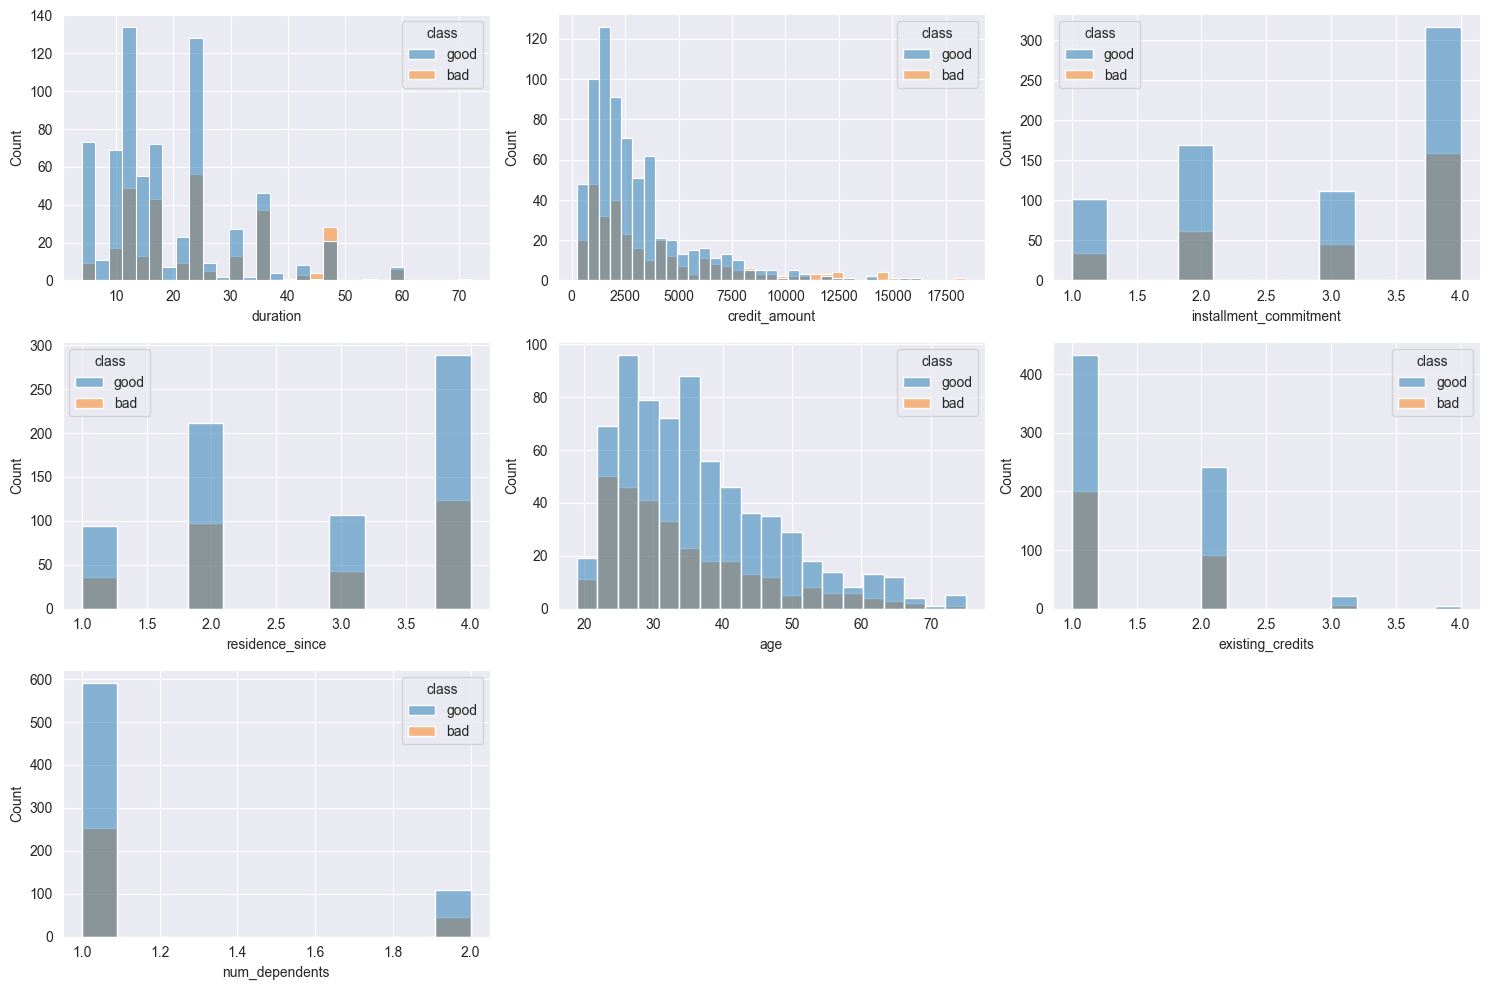

In [56]:
# Using a For Loop
plt.figure(figsize=(15,10))

# For all the columns i am setting hue = 'class'
for index, column in enumerate(numerical_feats): 
    ax = plt.subplot(3, 3, index + 1)
    sns.histplot(data=df_credits, x = column, hue= 'class', ax=ax)
    plt.tight_layout()

<Axes: xlabel='class', ylabel='count'>

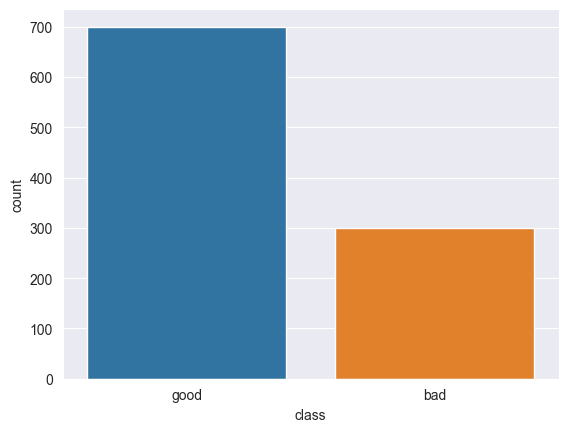

In [57]:
# Distribution of target alone
sns.countplot(data=df_credits, x='class')